<a href="https://colab.research.google.com/github/NoviceCoder2/Feynn_Labs/blob/main/EV_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/EV_Market_Segmentation/Final EV data.xlsx")
data.head()

,Vehicle full name,Manufacturing,Model,Top speed (km/hr),Price (INR),Fuel Type,Wheelers type,Battery capacity [kWh],Full charging time (HR),Kerb weight (KG),Range (km/hr),Fast Charging,Drive Type,Number of Seats,boot space (L),Number of Airbags,Type of brakes,Max Torque (N-M),Type of Vehicle
0,Revolt RV400,Revolt Motors,RV400,85.0,134000.0,Electric,Two wheeler,4.0,4.5,108.0,150.0,YES,Belt Drive,2,NaN,NaN,Disc,170.0,Motor cycles
1,Revolt RV300,Revolt Motors,RV300,65.0,94999.0,Electric,Two wheeler,2.7,4.2,101.0,180.0,YES,Hub Drive,2,NaN,NaN,Disc,NaN,Motor cycles
2,Tork Motors(Kratos ),Tork Motors,Kratos,100.0,192499.0,Electric,Two wheeler,4.0,5.0,NaN,180.0,NO,NaN,2,NaN,NaN,Disc,28.0,Motor cycles
3,Tork Motors(Kratos R),Tork Motors,Kratos R,105.0,207499.0,Electric,Two wheeler,4.0,5.0,NaN,180.0,YES,NaN,2,NaN,NaN,Disc,38.0,Motor cycles
4,Oben Rorr,Kabira Mobility,Oben Rorr,100.0,102999.0,Electric,Two wheeler,4.4,2.0,110.0,200.0,YES,Belt Drive,2,NaN,NaN,Disc,NaN,Motor cycles


In [ ]:
charging_station=pd.read_excel("/content/drive/MyDrive/EV_Market_Segmentation/Charging Station.xlsx")
charging_station.head()

,States Name,Number of Electric Charging Station
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujrat,228
4,Rajasthan,205


In [ ]:
sales=pd.read_excel("/content/drive/MyDrive/EV_Market_Segmentation/EV_sales.xlsx")
sales.head()

,Years,Two Wheeler,Three Wheeler,Four Wheeler
0,Year 2020,152000,140683,168300
1,Year 2021,143837,88378,134821
2,Year 2022,231338,384215,429217


In [ ]:
data3=pd.read_csv("/content/drive/MyDrive/EV_Market_Segmentation/Electric_Vehicle_Survey.csv")
data3.head()

,Name,Age,State / UT,Approx. Annual Income,Area of Living,Which vehicles do you prefer?,Are you willing to switch from Combustions Vehicles to EV?,What kind of Electric Vehicle do you want?,Budget
0,Sachin Bhandari,45,Gujarat,> 20 Lakh,Urban,Electric Vehicles,Yes,4 Wheeler,3000000
1,Lakshya Pokharna,21,Rajasthan,< 5 Lakh,Urban,Electric Vehicles,Yes,2 Wheeler,60000
2,Sunil Pokharna,53,Rajasthan,5 - 10 Lakh,Urban,Internal Combustion Vehicles,No,4 Wheeler,800000
3,akash patel,30,Rajasthan,< 5 Lakh,Urban,Electric Vehicles,Yes,2 Wheeler,70000
4,divya jain,31,Rajasthan,15 - 20 Lakh,Urban,Electric Vehicles,Yes,4 Wheeler,1200000


In [ ]:
data['Wheelers type']=data['Wheelers type'].replace('four wheeler','Four Wheeler')
data['Wheelers type']=data['Wheelers type'].replace('Four Wheeler','Four wheeler')
data['Fast Charging']=data['Fast Charging'].replace('NO','No')
data['Fast Charging']=data['Fast Charging'].replace('YES','Yes')
data['Fuel Type']=data['Fuel Type'].replace('electric','Electric')

In [ ]:
def income(price):
    if price <= 100000:
        return 'Low (Thousands)'
    elif price>100000 and price<10000000:
        return 'Medium (Lakhs)'
    else:
        return 'High(Crore)'

In [ ]:
data['Income'] = data['Price (INR)'].apply(income)

In [ ]:
data['Top speed (km/hr)']=data['Top speed (km/hr)'].fillna(data['Top speed (km/hr)'].mean())
data['Price (INR)']=data['Price (INR)'].fillna(data['Price (INR)'].mean())
data['Battery capacity [kWh]']=data['Battery capacity [kWh]'].fillna(data['Battery capacity [kWh]'].mean())
data['Kerb weight (KG)']=data['Kerb weight (KG)'].fillna(data['Kerb weight (KG)'].mean())
data['Max Torque (N-M)']=data['Max Torque (N-M)'].fillna(data['Max Torque (N-M)'].mean())
data['Full charging time (HR)']=data['Full charging time (HR)'].fillna(data['Full charging time (HR)'].mean())
data['Range (km/hr)']=data['Range (km/hr)'].fillna(data['Range (km/hr)'].mean())
data[' Drive Type']=data[' Drive Type'].fillna(data[' Drive Type'].mode()[0])
data['Type of brakes']=data['Type of brakes'].fillna(data['Type of brakes'].mode()[0])

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Two Wheeler,Three Wheeler & Four Wheeler sales ')

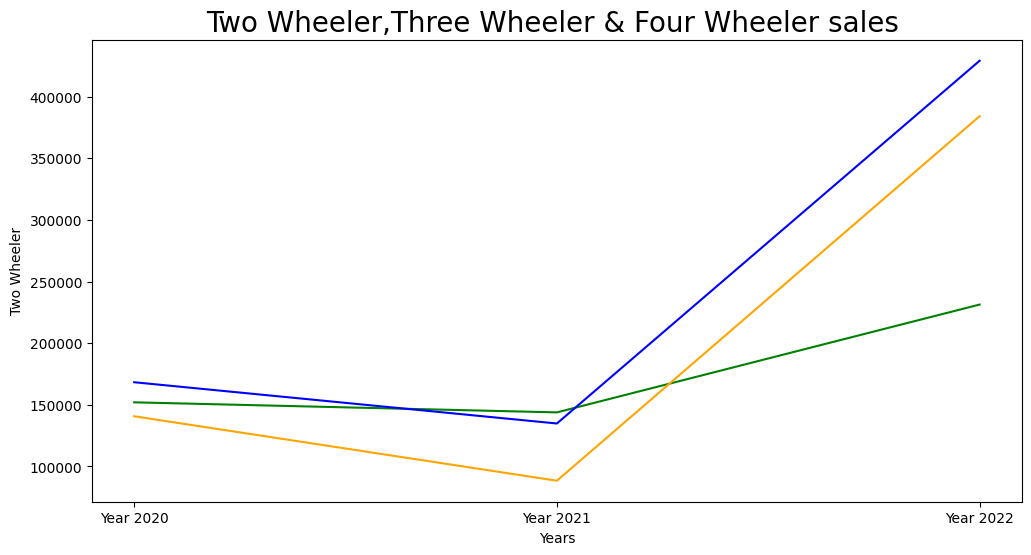

In [ ]:
plt.figure(figsize=(12,6))
print(sns.lineplot(y=sales['Two Wheeler'],x=sales['Years'], color = "green"))
print(sns.lineplot(y=sales['Three Wheeler'],x=sales['Years'], color = "orange"))
print(sns.lineplot(y=sales['Four Wheeler'],x=sales['Years'], color = "blue"))
plt.title('Two Wheeler,Three Wheeler & Four Wheeler sales ',fontsize = 20)

Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Two Wheeler sales ')

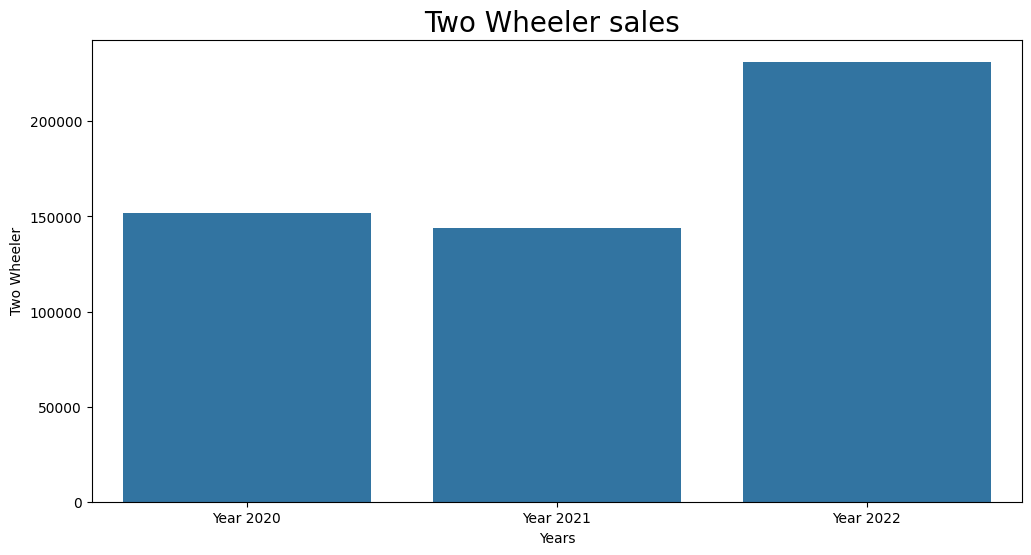

In [ ]:
plt.figure(figsize=(12,6))
print(sns.barplot(y=sales['Two Wheeler'],x=sales['Years']))
plt.title('Two Wheeler sales ',fontsize = 20)

Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Three Wheeler sales ')

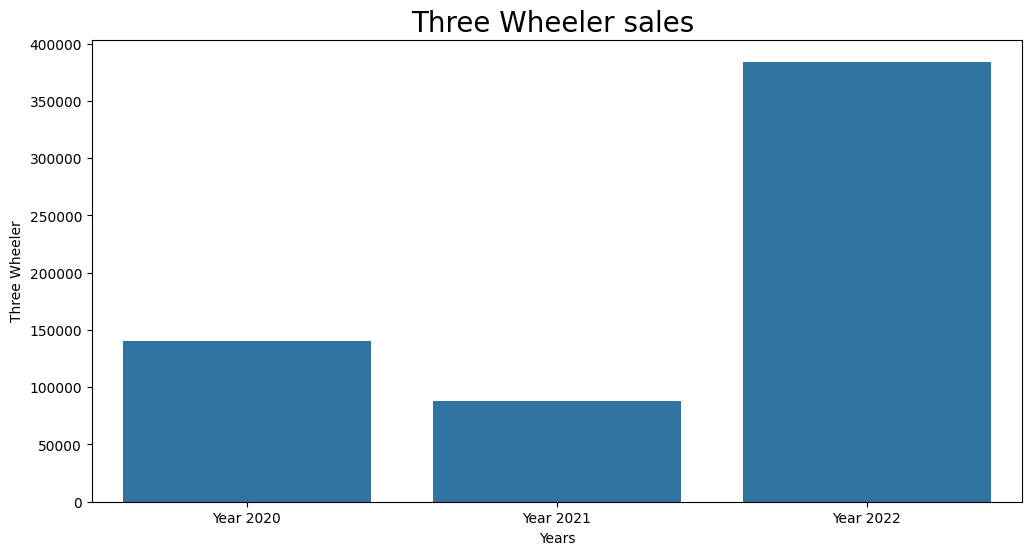

In [ ]:
plt.figure(figsize=(12,6))
print(sns.barplot(y=sales['Three Wheeler'],x=sales['Years']))
plt.title('Three Wheeler sales ',fontsize = 20)

Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Four Wheeler sales ')

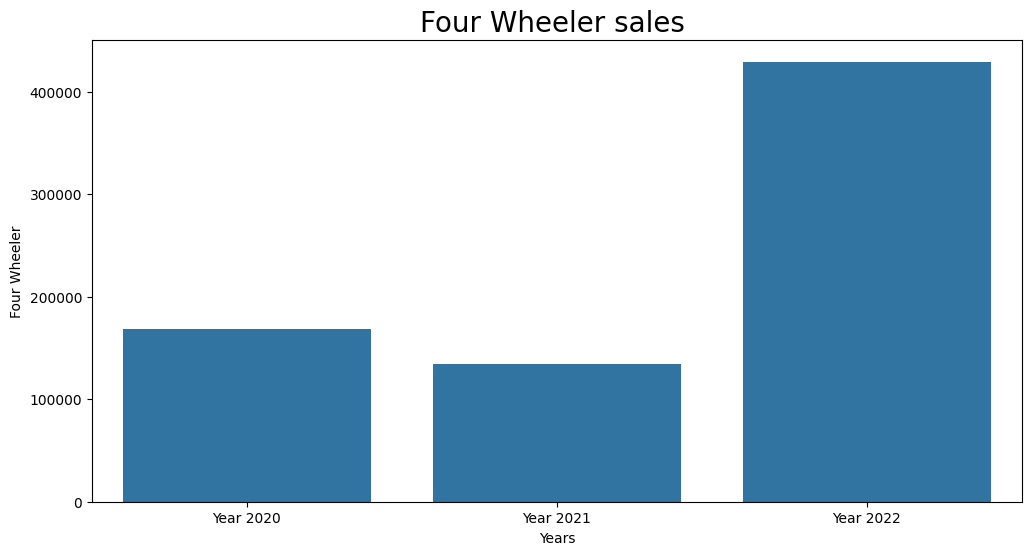

In [ ]:
plt.figure(figsize=(12,6))
print(sns.barplot(y=sales['Four Wheeler'],x=sales['Years']))
plt.title('Four Wheeler sales ',fontsize = 20)

<Figure size 1200x600 with 0 Axes>

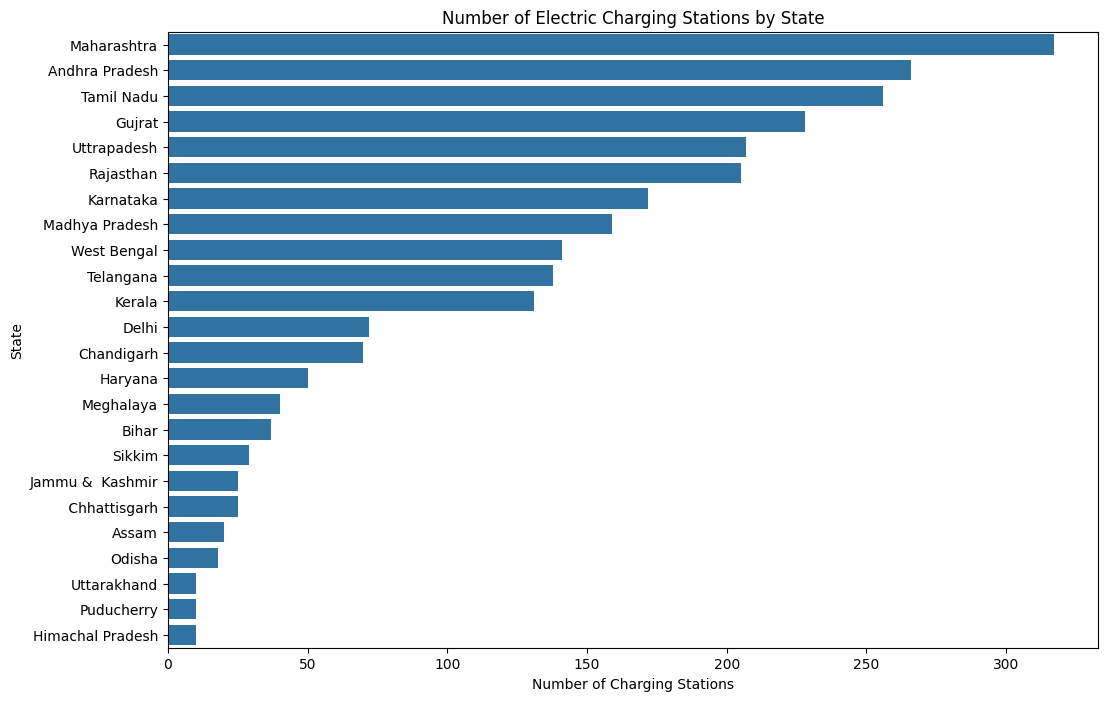

In [ ]:
plt.figure(figsize=(12,6))

# Renaming columns for easier access
charging_station.columns = ['State', 'Number_of_Charging_Stations']

# Plotting the count plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(y='State', x='Number_of_Charging_Stations', data=charging_station, order=charging_station.sort_values('Number_of_Charging_Stations', ascending=False).State)
plt.title('Number of Electric Charging Stations by State')
plt.xlabel('Number of Charging Stations')
plt.ylabel('State')
plt.show()

Text(0.5, 1.0, 'Type of Vehicle')

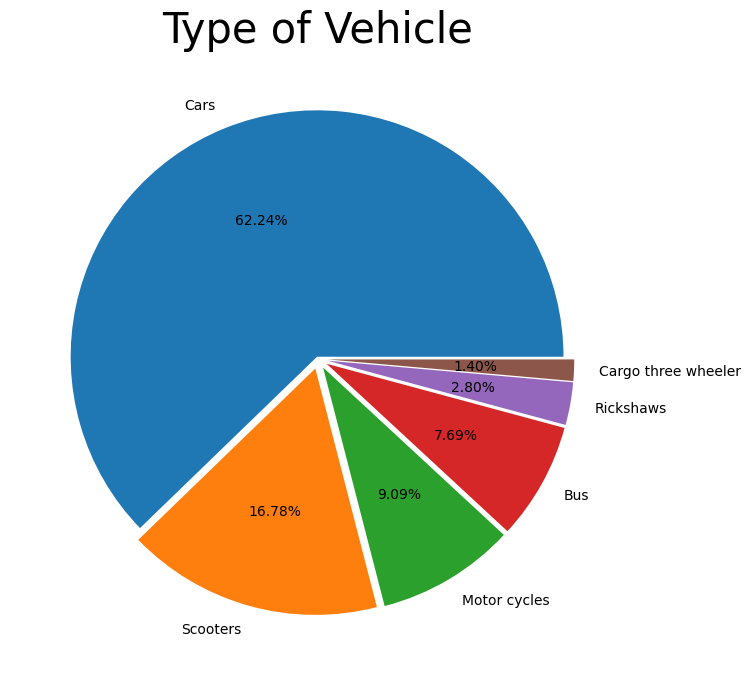

In [ ]:
plt.figure(figsize=(25,8))
explode = [0.01,0.04,0.04,0.04,0.04,0.04]
labels=['Cars','Scooters','Motor cycles','Bus','Rickshaws','Cargo three wheeler']
plt.pie(data['Type of Vehicle'].value_counts(),
        labels=labels,autopct = '%.2f%%',explode=explode)
plt.title('Type of Vehicle', fontsize = 30)

Text(0.5, 1.0, 'Wheelers type')

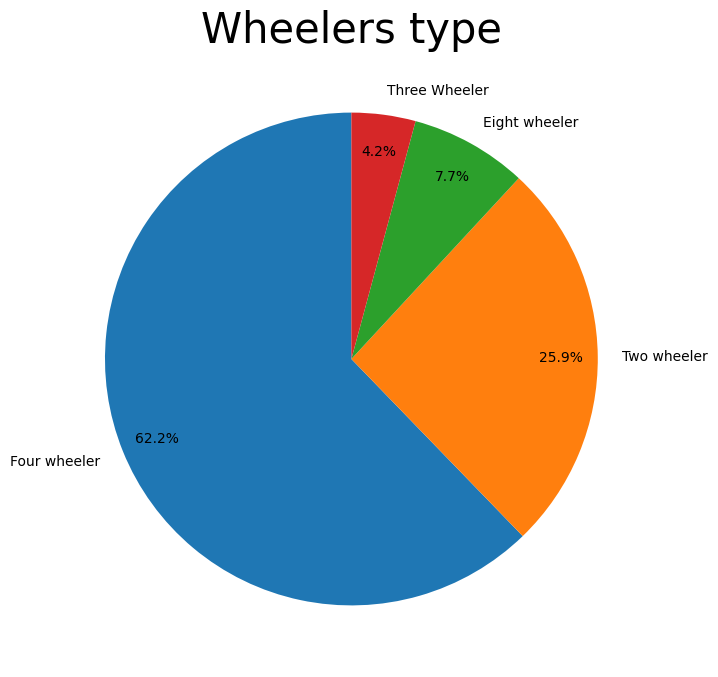

In [ ]:
plt.figure(figsize=(25,8))
labels=['Four wheeler','Two wheeler','Eight wheeler','Three Wheeler']
plt.pie(data['Wheelers type'].value_counts(),labels=labels, autopct='%1.1f%%',
         startangle=90, pctdistance=0.85,)
plt.title('Wheelers type', fontsize = 30)

In [ ]:
data.head()

,Vehicle full name,Manufacturing,Model,Top speed (km/hr),Price (INR),Fuel Type,Wheelers type,Battery capacity [kWh],Full charging time (HR),Kerb weight (KG),Range (km/hr),Fast Charging,Drive Type,Number of Seats,boot space (L),Number of Airbags,Type of brakes,Max Torque (N-M),Type of Vehicle,Income
0,Revolt RV400,Revolt Motors,RV400,85.0,134000.0,Electric,Two wheeler,4.0,4.5,108.000000,150.0,Yes,Belt Drive,2,NaN,NaN,Disc,170.00000,Motor cycles,Medium (Lakhs)
1,Revolt RV300,Revolt Motors,RV300,65.0,94999.0,Electric,Two wheeler,2.7,4.2,101.000000,180.0,Yes,Hub Drive,2,NaN,NaN,Disc,346.74958,Motor cycles,Low (Thousands)
2,Tork Motors(Kratos ),Tork Motors,Kratos,100.0,192499.0,Electric,Two wheeler,4.0,5.0,1506.382114,180.0,No,FWD,2,NaN,NaN,Disc,28.00000,Motor cycles,Medium (Lakhs)
3,Tork Motors(Kratos R),Tork Motors,Kratos R,105.0,207499.0,Electric,Two wheeler,4.0,5.0,1506.382114,180.0,Yes,FWD,2,NaN,NaN,Disc,38.00000,Motor cycles,Medium (Lakhs)
4,Oben Rorr,Kabira Mobility,Oben Rorr,100.0,102999.0,Electric,Two wheeler,4.4,2.0,110.000000,200.0,Yes,Belt Drive,2,NaN,NaN,Disc,346.74958,Motor cycles,Medium (Lakhs)


In [ ]:
final=['Top speed (km/hr)','Price (INR)', 'Full charging time (HR)','Fuel Type','Battery capacity [kWh]','Range (km/hr)',
       'Kerb weight (KG)','Fast Charging', ' Drive Type','Wheelers type',' Number of Seats', 'Type of brakes', 'Max Torque (N-M)','Income'
      ]
new_data=data.loc[:,final]
new_data

,Top speed (km/hr),Price (INR),Full charging time (HR),Fuel Type,Battery capacity [kWh],Range (km/hr),Kerb weight (KG),Fast Charging,Drive Type,Wheelers type,Number of Seats,Type of brakes,Max Torque (N-M),Income
0,85.00000,1.340000e+05,4.500000,Electric,4.000000,150.000000,108.000000,Yes,Belt Drive,Two wheeler,2,Disc,170.00000,Medium (Lakhs)
1,65.00000,9.499900e+04,4.200000,Electric,2.700000,180.000000,101.000000,Yes,Hub Drive,Two wheeler,2,Disc,346.74958,Low (Thousands)
2,100.00000,1.924990e+05,5.000000,Electric,4.000000,180.000000,1506.382114,No,FWD,Two wheeler,2,Disc,28.00000,Medium (Lakhs)
3,105.00000,2.074990e+05,5.000000,Electric,4.000000,180.000000,1506.382114,Yes,FWD,Two wheeler,2,Disc,38.00000,Medium (Lakhs)
4,100.00000,1.029990e+05,2.000000,Electric,4.400000,200.000000,110.000000,Yes,Belt Drive,Two wheeler,2,Disc,346.74958,Medium (Lakhs)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,65.00000,3.893761e+06,3.000000,Electric,250.000000,200.000000,1506.382114,Yes,FWD,Eight wheeler,31,disc (front + rear),346.74958,High(Crore)
139,75.00000,1.600000e+07,2.500000,Electric,124.000000,150.000000,1506.382114,Yes,FWD,Eight wheeler,31,front disc brakes,3000.00000,High(Crore)
140,70.00000,1.500000e+07,4.500000,Electric,41.355385,300.000000,1506.382114,Yes,FWD,Eight wheeler,39,disc (front + rear),800.00000,High(Crore)
141,129.76259,3.893761e+06,7.344911,Electric,41.355385,293.126929,1506.382114,Yes,FWD,Eight wheeler,43,disc (front + rear),346.74958,High(Crore)


Text(0, 0.5, 'Counts')

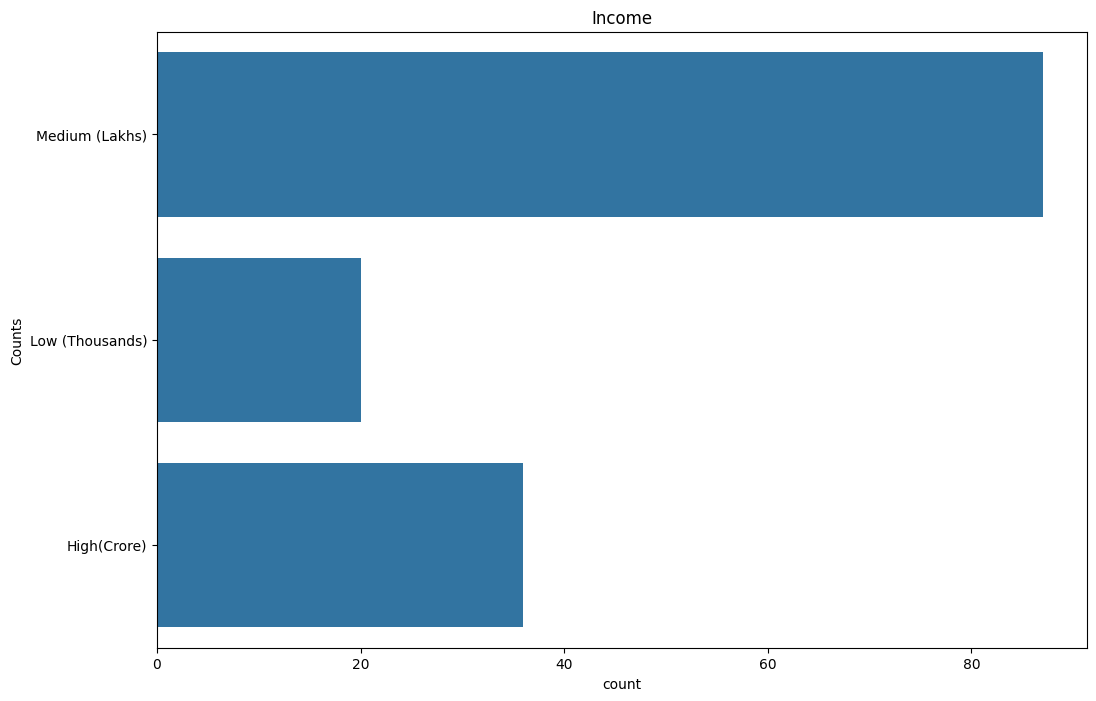

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(new_data['Income'])
plt.title('Income')
plt.ylabel('Counts')

In [ ]:
sales.head()

,Years,Two Wheeler,Three Wheeler,Four Wheeler
0,Year 2020,152000,140683,168300
1,Year 2021,143837,88378,134821
2,Year 2022,231338,384215,429217


Text(0.5, 1.0, 'Car Price vs Charging Time ')

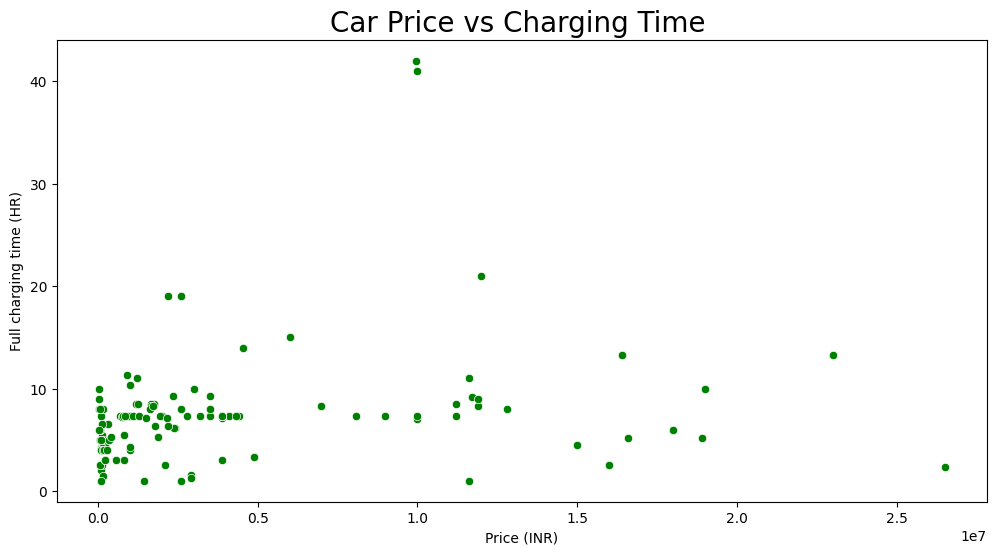

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Price (INR)',y='Full charging time (HR)',data=data, color='green')
plt.title('Car Price vs Charging Time ',fontsize = 20)

Text(0.5, 1.0, 'Car Price vs Top Speed ')

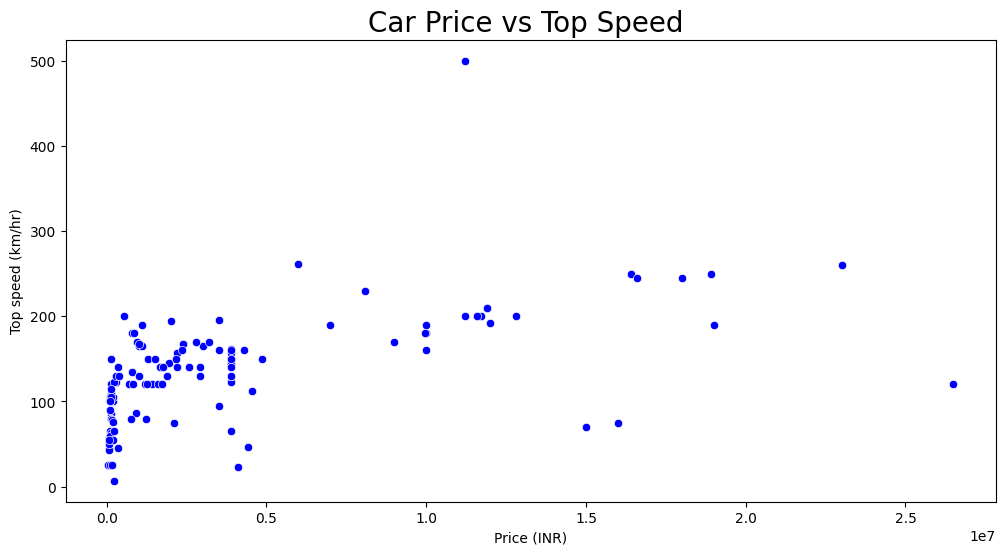

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Price (INR)',y='Top speed (km/hr)',data=new_data, color='blue')
plt.title('Car Price vs Top Speed ',fontsize = 20)

Text(0.5, 1.0, 'Battery capacity vs Top Speed ')

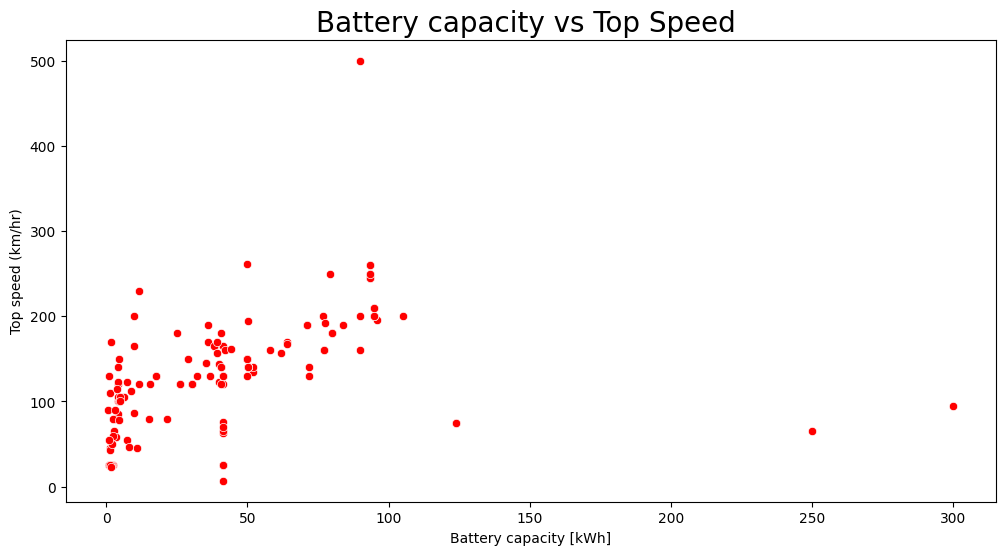

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Battery capacity [kWh]',y='Top speed (km/hr)',data=new_data, color='red')
plt.title('Battery capacity vs Top Speed ',fontsize = 20)

In [ ]:
from sklearn.preprocessing import LabelEncoder

features =['Wheelers type', ' Drive Type', 'Type of brakes','Fast Charging','Income','Fuel Type' ]

for i in features:
     new_data[i] =LabelEncoder().fit_transform(new_data[i])
new_data

,Top speed (km/hr),Price (INR),Full charging time (HR),Fuel Type,Battery capacity [kWh],Range (km/hr),Kerb weight (KG),Fast Charging,Drive Type,Wheelers type,Number of Seats,Type of brakes,Max Torque (N-M),Income
0,85.00000,1.340000e+05,4.500000,0,4.000000,150.000000,108.000000,1,11,3,2,1,170.00000,2
1,65.00000,9.499900e+04,4.200000,0,2.700000,180.000000,101.000000,1,15,3,2,1,346.74958,1
2,100.00000,1.924990e+05,5.000000,0,4.000000,180.000000,1506.382114,0,14,3,2,1,28.00000,2
3,105.00000,2.074990e+05,5.000000,0,4.000000,180.000000,1506.382114,1,14,3,2,1,38.00000,2
4,100.00000,1.029990e+05,2.000000,0,4.400000,200.000000,110.000000,1,11,3,2,1,346.74958,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,65.00000,3.893761e+06,3.000000,0,250.000000,200.000000,1506.382114,1,14,0,31,2,346.74958,0
139,75.00000,1.600000e+07,2.500000,0,124.000000,150.000000,1506.382114,1,14,0,31,4,3000.00000,0
140,70.00000,1.500000e+07,4.500000,0,41.355385,300.000000,1506.382114,1,14,0,39,2,800.00000,0
141,129.76259,3.893761e+06,7.344911,0,41.355385,293.126929,1506.382114,1,14,0,43,2,346.74958,0


In [ ]:
data.head()

,Vehicle full name,Manufacturing,Model,Top speed (km/hr),Price (INR),Fuel Type,Wheelers type,Battery capacity [kWh],Full charging time (HR),Kerb weight (KG),Range (km/hr),Fast Charging,Drive Type,Number of Seats,boot space (L),Number of Airbags,Type of brakes,Max Torque (N-M),Type of Vehicle,Income
0,Revolt RV400,Revolt Motors,RV400,85.0,134000.0,Electric,Two wheeler,4.0,4.5,108.000000,150.0,Yes,Belt Drive,2,NaN,NaN,Disc,170.00000,Motor cycles,Medium (Lakhs)
1,Revolt RV300,Revolt Motors,RV300,65.0,94999.0,Electric,Two wheeler,2.7,4.2,101.000000,180.0,Yes,Hub Drive,2,NaN,NaN,Disc,346.74958,Motor cycles,Low (Thousands)
2,Tork Motors(Kratos ),Tork Motors,Kratos,100.0,192499.0,Electric,Two wheeler,4.0,5.0,1506.382114,180.0,No,FWD,2,NaN,NaN,Disc,28.00000,Motor cycles,Medium (Lakhs)
3,Tork Motors(Kratos R),Tork Motors,Kratos R,105.0,207499.0,Electric,Two wheeler,4.0,5.0,1506.382114,180.0,Yes,FWD,2,NaN,NaN,Disc,38.00000,Motor cycles,Medium (Lakhs)
4,Oben Rorr,Kabira Mobility,Oben Rorr,100.0,102999.0,Electric,Two wheeler,4.4,2.0,110.000000,200.0,Yes,Belt Drive,2,NaN,NaN,Disc,346.74958,Motor cycles,Medium (Lakhs)


array([[<Axes: title={'center': 'Price (INR)'}>,
        <Axes: title={'center': 'Top speed (km/hr)'}>,
        <Axes: title={'center': 'Battery capacity [kWh]'}>],
       [<Axes: title={'center': 'Kerb weight (KG)'}>,
        <Axes: title={'center': 'Range (km/hr)'}>,
        <Axes: title={'center': 'boot space (L)'}>],
       [<Axes: title={'center': 'Max Torque (N-M)'}>,
        <Axes: title={'center': ' Number of Seats'}>, <Axes: >]],
      dtype=object)

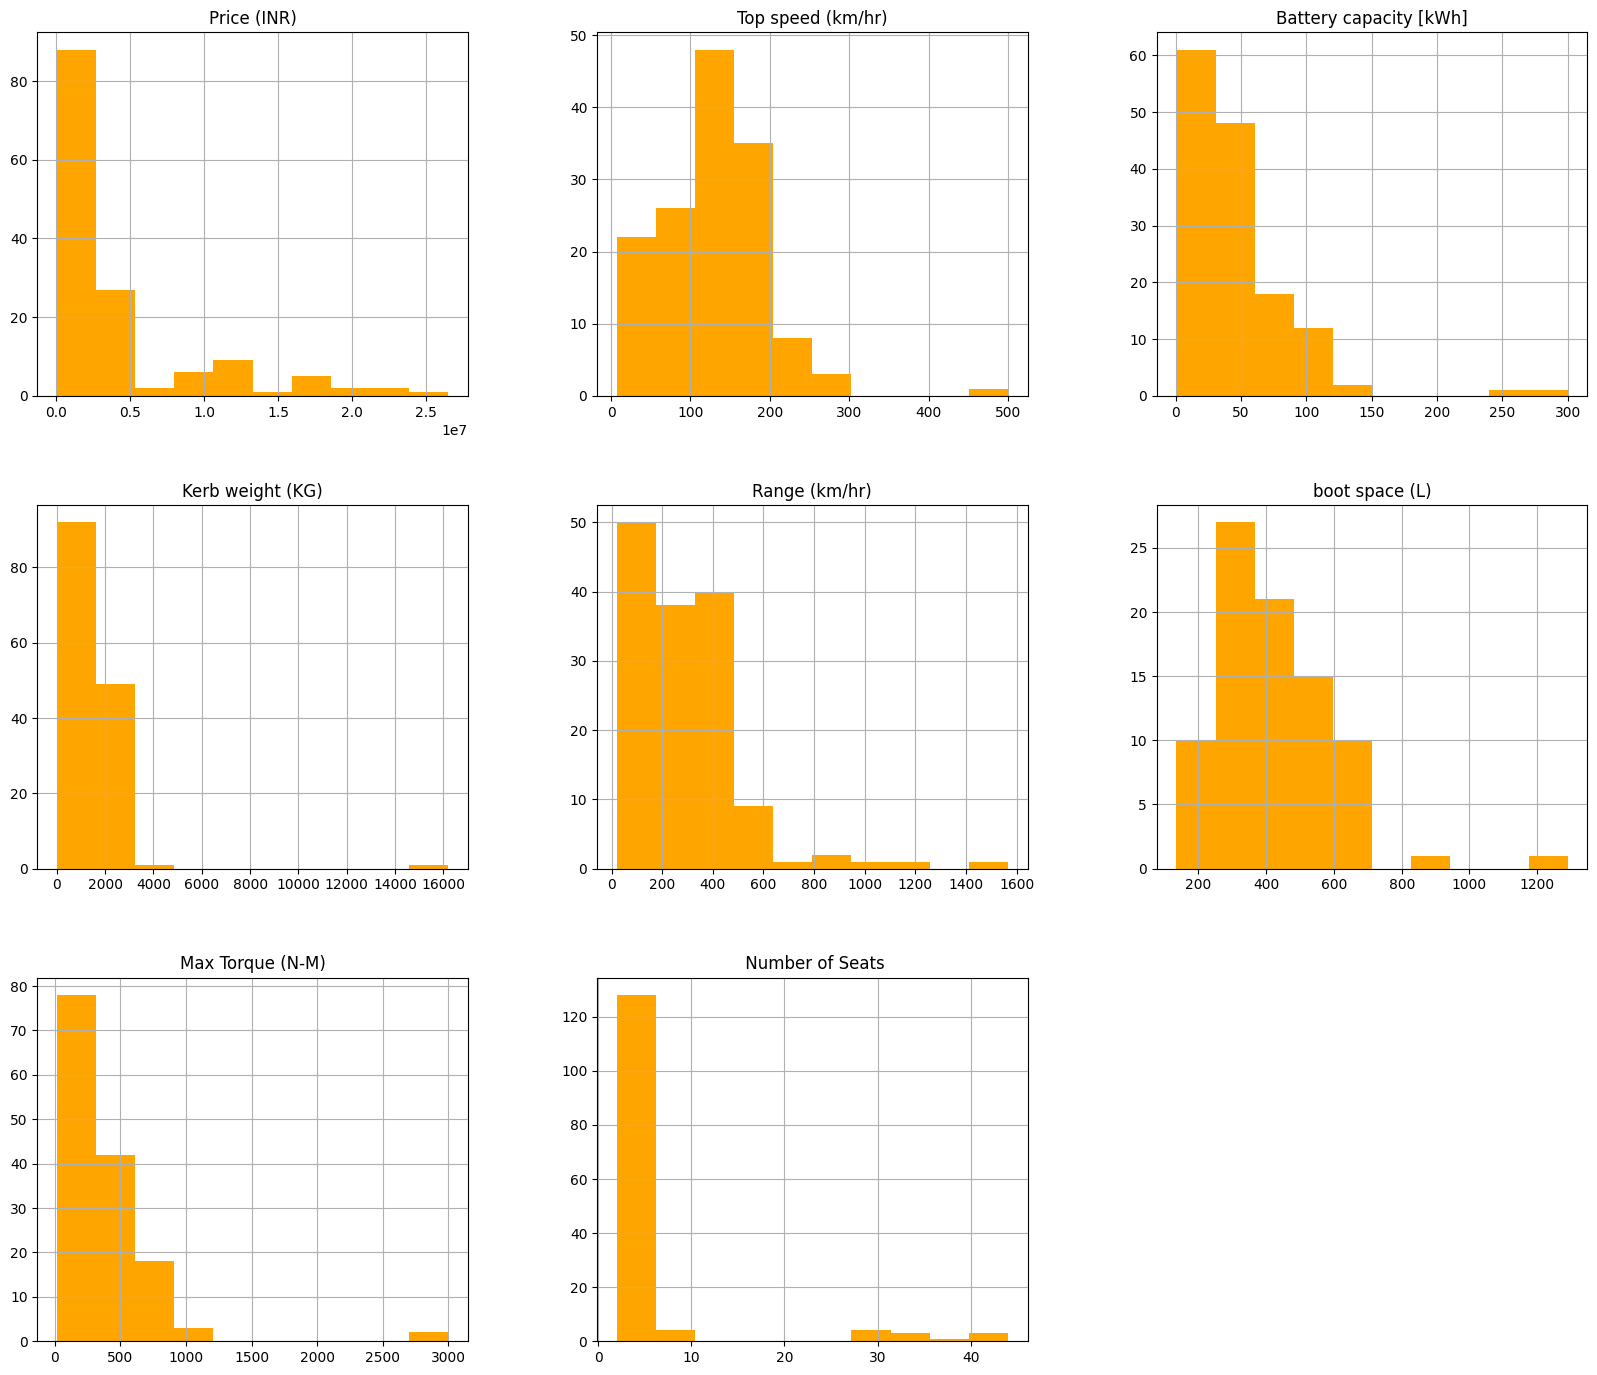

In [ ]:
plt.rcParams['figure.figsize']=(20,17)
data.hist(['Price (INR)','Top speed (km/hr)','Battery capacity [kWh]','Kerb weight (KG)','Range (km/hr)',
           'boot space (L)','Max Torque (N-M)',' Number of Seats'], color='Orange')

In [ ]:
new_data.isna().sum()

Top speed (km/hr)          0
Price (INR)                0
Full charging time (HR)    0
Fuel Type                  0
Battery capacity [kWh]     0
Range (km/hr)              0
Kerb weight (KG)           0
Fast Charging              0
 Drive Type                0
Wheelers type              0
 Number of Seats           0
Type of brakes             0
Max Torque (N-M)           0
Income                     0
dtype: int64

In [ ]:
x = new_data.loc[:,final].values
x

array([[8.50000000e+01, 1.34000000e+05, 4.50000000e+00, ...,
        1.00000000e+00, 1.70000000e+02, 2.00000000e+00],
       [6.50000000e+01, 9.49990000e+04, 4.20000000e+00, ...,
        1.00000000e+00, 3.46749580e+02, 1.00000000e+00],
       [1.00000000e+02, 1.92499000e+05, 5.00000000e+00, ...,
        1.00000000e+00, 2.80000000e+01, 2.00000000e+00],
       ...,
       [7.00000000e+01, 1.50000000e+07, 4.50000000e+00, ...,
        2.00000000e+00, 8.00000000e+02, 0.00000000e+00],
       [1.29762590e+02, 3.89376089e+06, 7.34491071e+00, ...,
        2.00000000e+00, 3.46749580e+02, 0.00000000e+00],
       [1.29762590e+02, 3.89376089e+06, 7.34491071e+00, ...,
        2.00000000e+00, 3.46749580e+02, 0.00000000e+00]])

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=5)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5
0,-3.759761e+06,-1031.676497,-12.795436,-82.651999,-4.139288
1,-3.798762e+06,-1030.126184,162.762464,-40.313961,-24.227808
2,-3.701262e+06,357.275408,-190.168112,-96.207267,-2.523818
3,-3.686262e+06,356.050970,-180.809000,-95.151492,2.477828
4,-3.790762e+06,-1021.264643,159.982353,-17.550615,8.698158
...,...,...,...,...,...
138,-7.077944e-04,1.543989,15.534895,-94.193375,-40.399071
139,1.210624e+07,-1142.792554,2268.255021,-83.524449,-75.618769
140,1.110624e+07,-1093.870469,95.359154,-96.522639,-125.663079
141,5.641733e-06,0.080624,0.344553,-0.072516,-1.370983


In [ ]:
loadings = pca.components_
num_pc = pca.n_features_

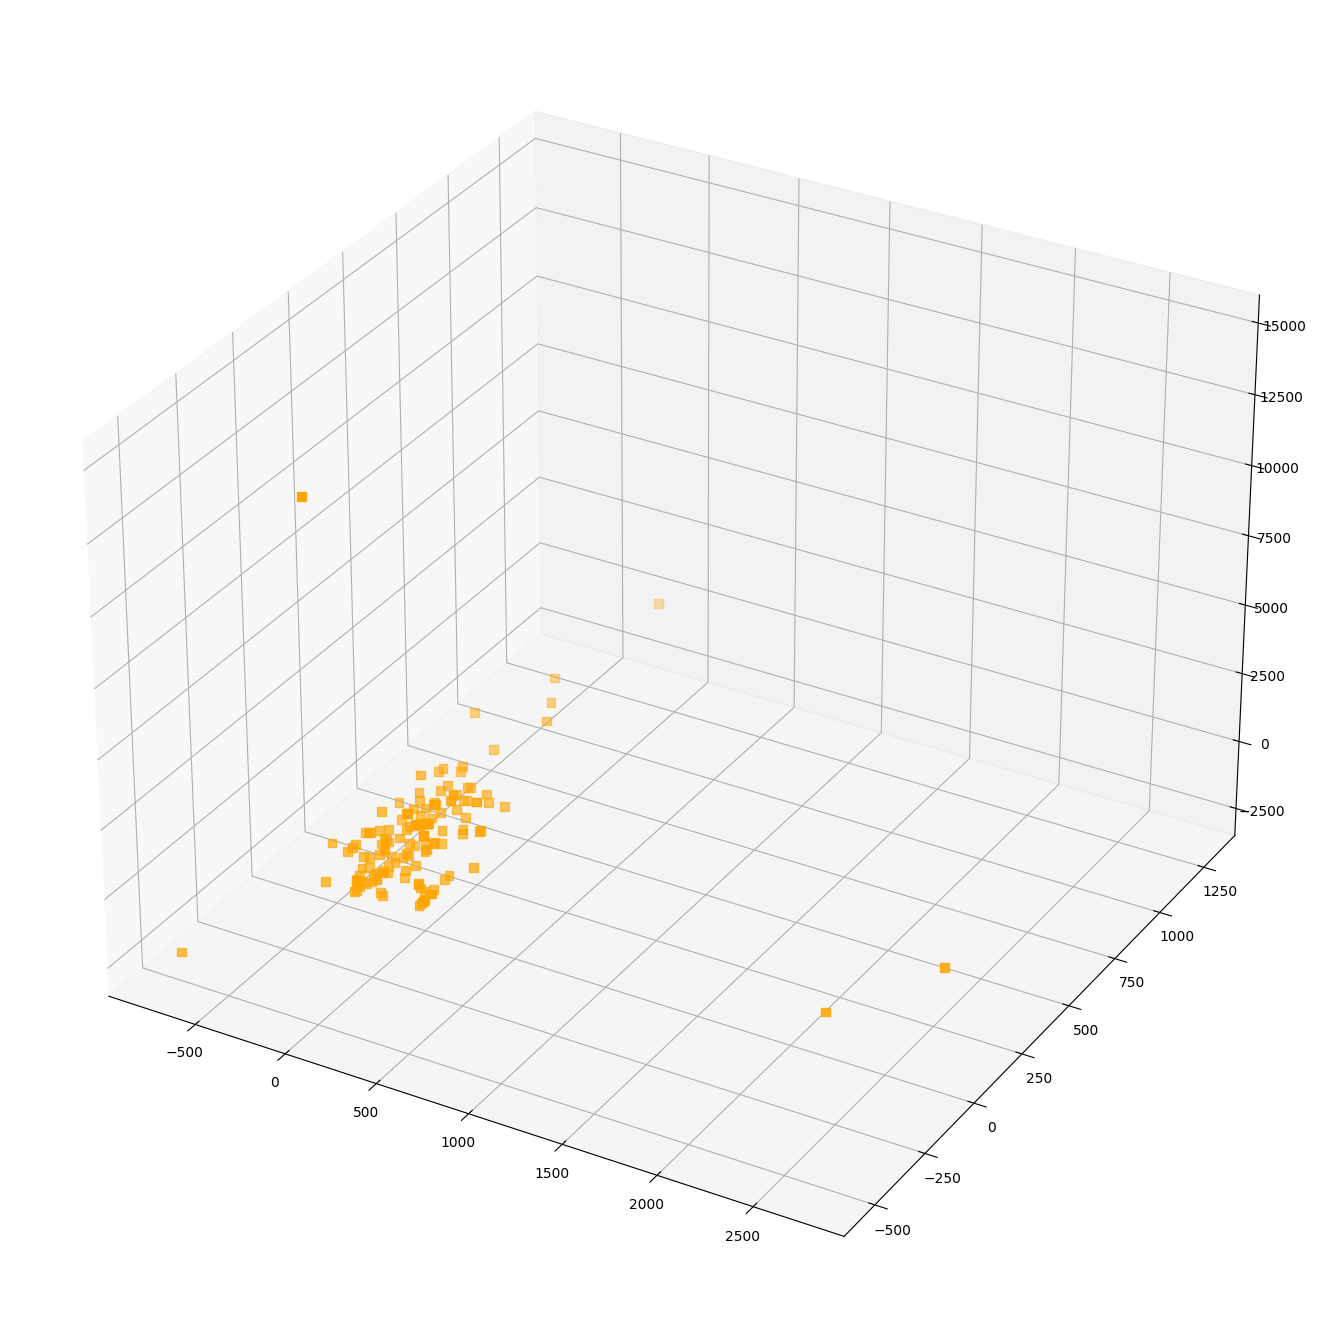

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

ax = plt.axes(projection ='3d')

z = pf['pc2']
x = pf['pc3']
y = pf['pc4']
ax.scatter(x, y, z, marker="s", s=40, c='orange')

plt.show()

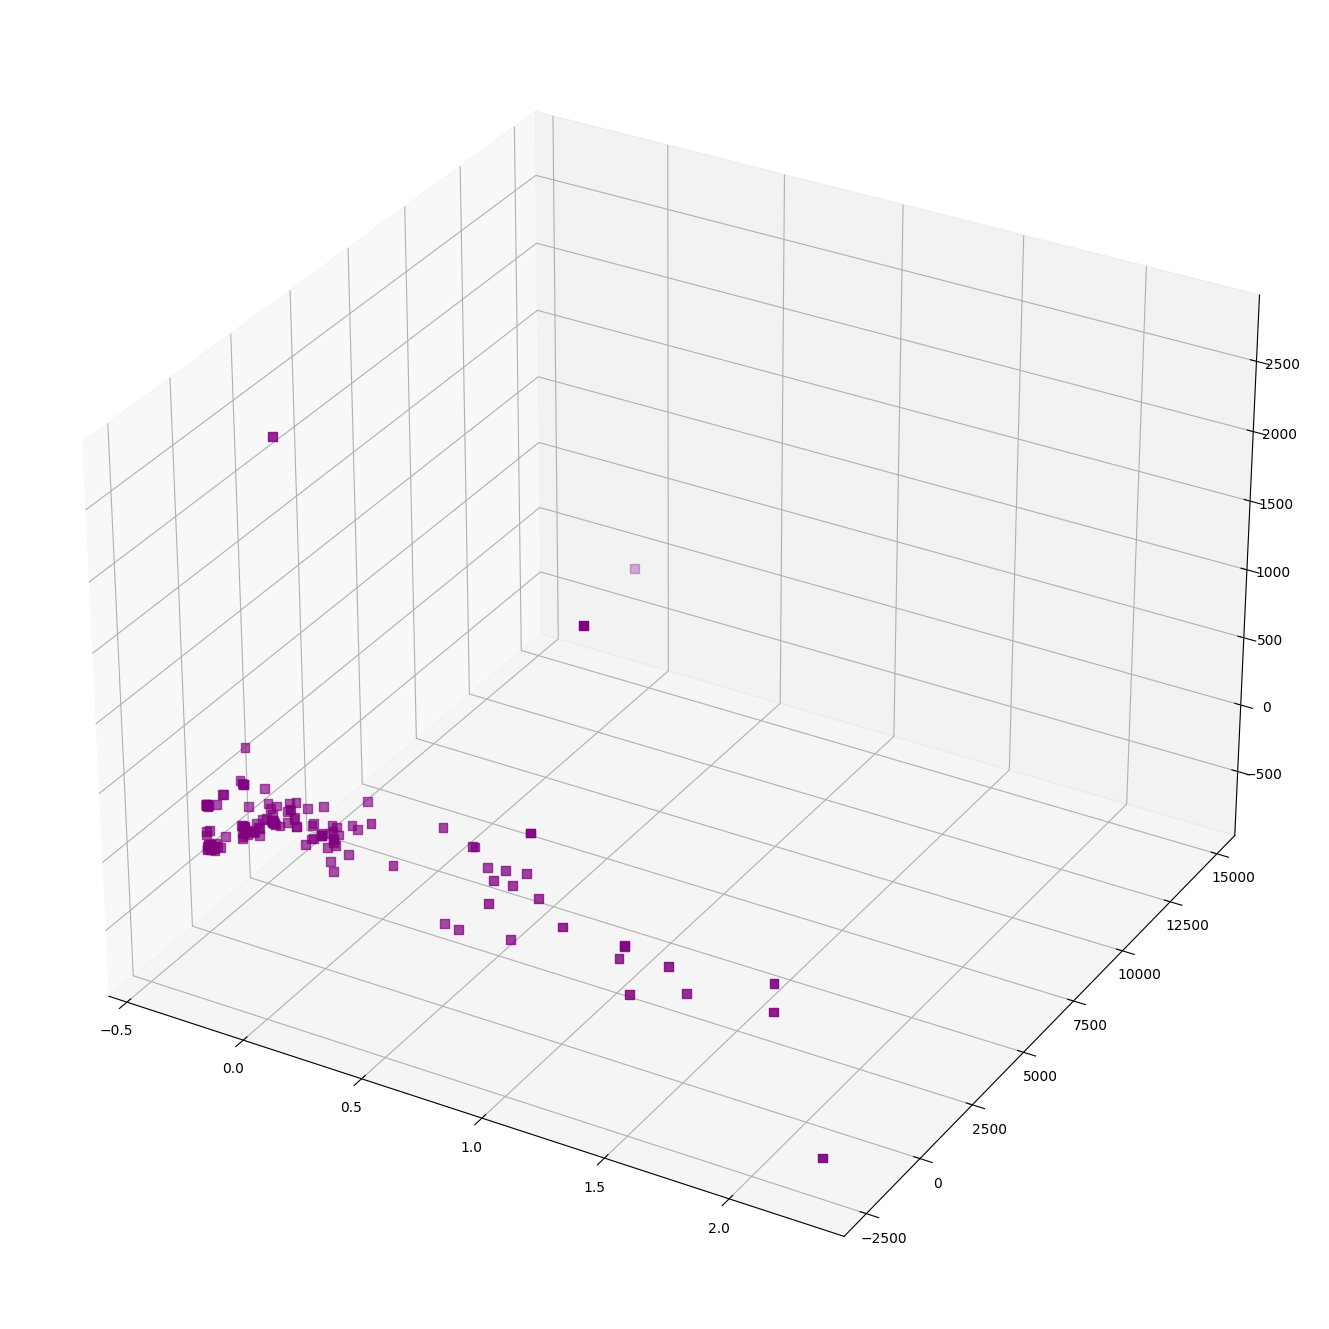

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = pf['pc1']
y = pf['pc2']
z = pf['pc3']

ax.scatter(x,y,z, marker="s", s=40, color="purple")

plt.show()

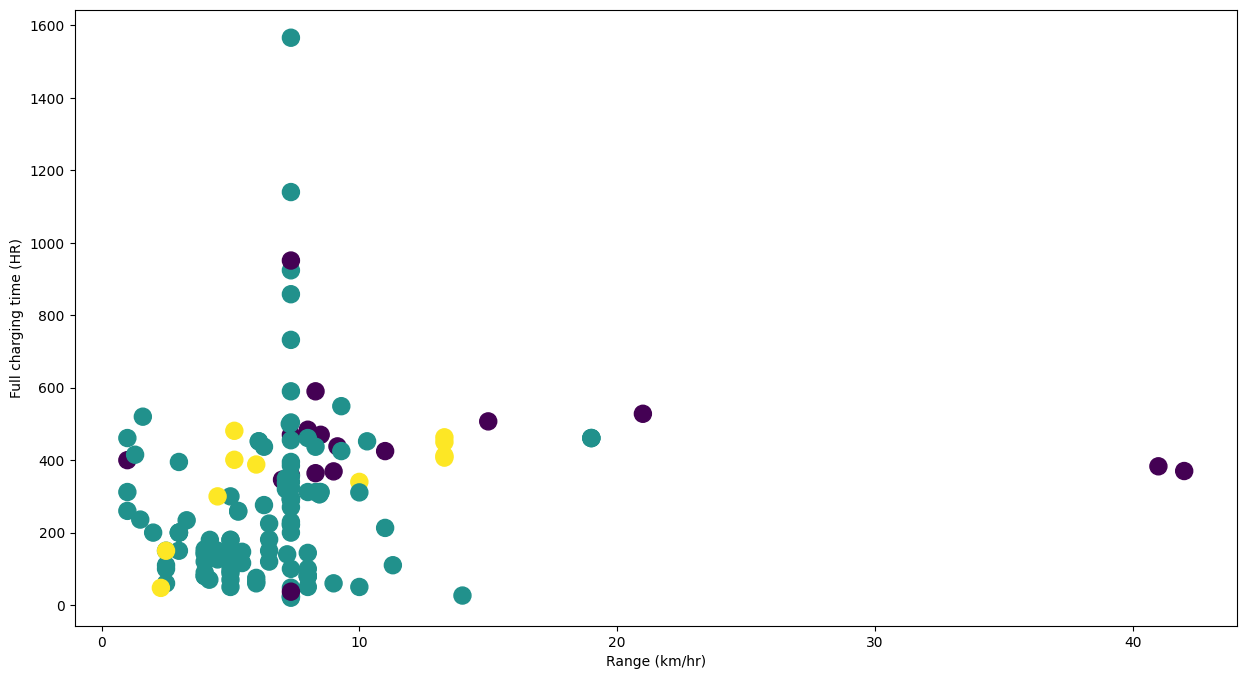

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
data_predict = kmeans.fit_predict(new_data)
data_predict.shape
plt.figure(figsize=(15,8))
plt.scatter( y ='Range (km/hr)', x = 'Full charging time (HR)', data = data , c = data_predict , s =150, cmap='viridis' )
plt.xlabel('Range (km/hr)')
plt.ylabel('Full charging time (HR)')
plt.show()

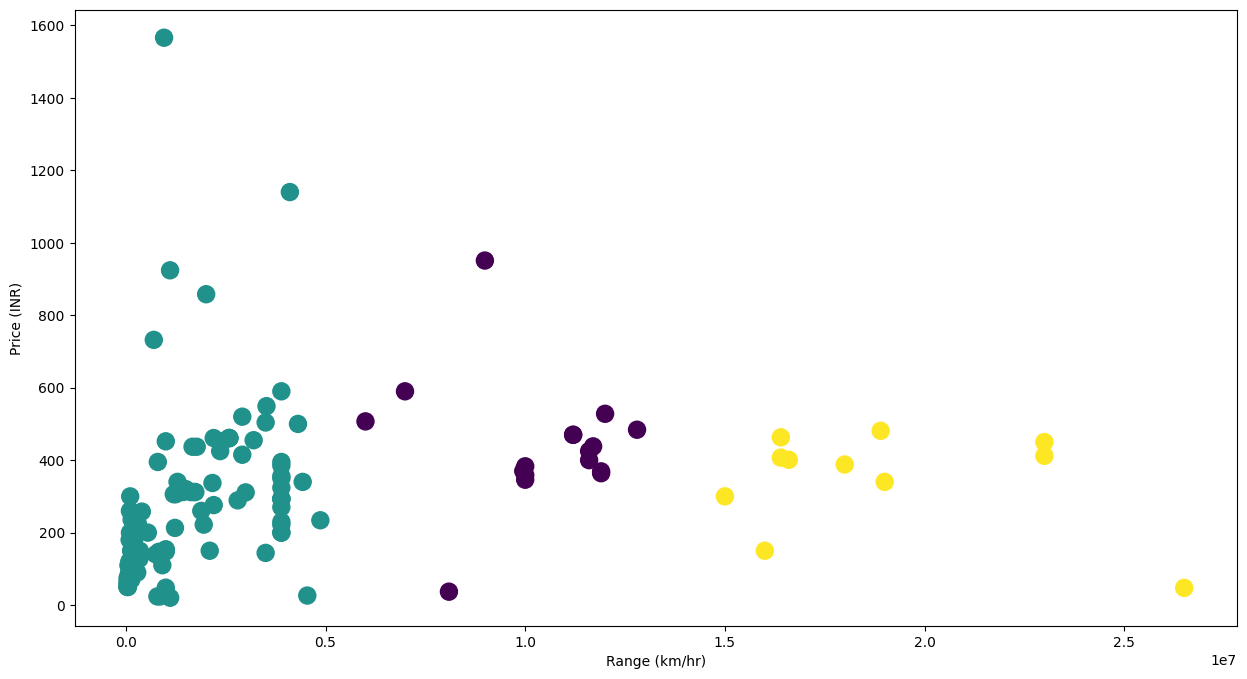

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter( y ='Range (km/hr)' ,x = 'Price (INR)', data = data , c = data_predict , s =150,cmap='viridis' )
plt.xlabel('Range (km/hr)')
plt.ylabel('Price (INR)')
plt.show()

In [ ]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 115, 0: 17, 2: 11})

In [ ]:
kmeans.cluster_centers_[:,1]

array([10348235.29411765,  1496415.71722278, 18981818.18181818])

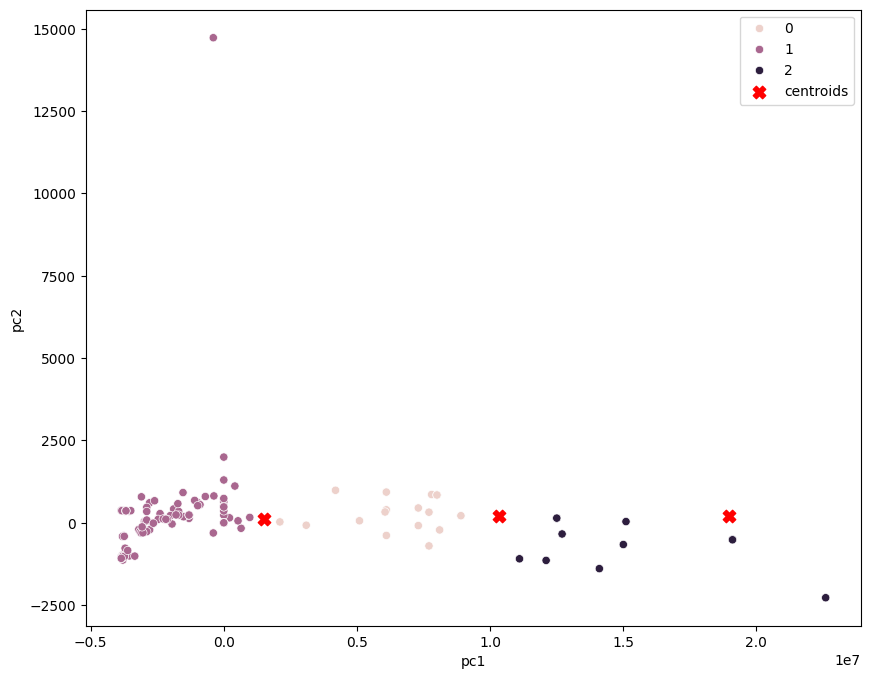

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0],
            marker="X", c="r", s=80, label="centroids")
plt.legend()

In [ ]:
data3.head(10)

,Name,Age,State / UT,Approx. Annual Income,Area of Living,Which vehicles do you prefer?,Are you willing to switch from Combustions Vehicles to EV?,What kind of Electric Vehicle do you want?,Budget
0,Sachin Bhandari,45,Gujarat,> 20 Lakh,Urban,Electric Vehicles,Yes,4 Wheeler,3000000
1,Lakshya Pokharna,21,Rajasthan,< 5 Lakh,Urban,Electric Vehicles,Yes,2 Wheeler,60000
2,Sunil Pokharna,53,Rajasthan,5 - 10 Lakh,Urban,Internal Combustion Vehicles,No,4 Wheeler,800000
3,akash patel,30,Rajasthan,< 5 Lakh,Urban,Electric Vehicles,Yes,2 Wheeler,70000
4,divya jain,31,Rajasthan,15 - 20 Lakh,Urban,Electric Vehicles,Yes,4 Wheeler,1200000
5,ayusi jain,30,Rajasthan,15 - 20 Lakh,Urban,Electric Vehicles,Yes,4 Wheeler,1500000
6,Akshit Bhandari,32,Rajasthan,5 - 10 Lakh,Urban,Electric Vehicles,Yes,4 Wheeler,600000
7,Swati Dhakar,38,Rajasthan,< 5 Lakh,Urban,Internal Combustion Vehicles,Yes,2 Wheeler,40000
8,Kavita,54,Uttar Pradesh,5 - 10 Lakh,Sub Urban,Electric Vehicles,Yes,4 Wheeler,600000
9,Animesh Thakre,21,Maharashtra,5 - 10 Lakh,Sub Urban,Electric Vehicles,Yes,4 Wheeler,600000


In [ ]:
data3.describe()

,Age,Budget
count,262.000000,2.620000e+02
mean,30.122137,6.354085e+05
std,13.069237,9.674006e+05
min,17.000000,3.000000e+03
25%,21.000000,7.000000e+04
50%,25.000000,2.000000e+05
75%,34.000000,8.750000e+05
max,88.000000,8.000000e+06


In [ ]:
data3.isna().sum()

Name                                                          0
Age                                                           0
State / UT                                                    0
Approx. Annual Income                                         0
Area of Living                                                0
Which vehicles do you prefer?                                 0
Are you willing to switch from Combustions Vehicles to EV?    0
What kind of Electric Vehicle do you want?                    0
Budget                                                        0
dtype: int64

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Name                                                        262 non-null    object
 1   Age                                                         262 non-null    int64 
 2   State / UT                                                  262 non-null    object
 3   Approx. Annual Income                                       262 non-null    object
 4   Area of Living                                              262 non-null    object
 5   Which vehicles do you prefer?                               262 non-null    object
 6   Are you willing to switch from Combustions Vehicles to EV?  262 non-null    object
 7   What kind of Electric Vehicle do you want?                  262 non-null    object
 8   Budget     

In [ ]:
data3.rename(columns = {'State / UT':'State', 'Approx. Annual Income':'Income','Area of Living':'Area_of_Living','Are you willing to switch from Combustions Vehicles to EV?':'Switch_EV','What kind of Electric Vehicle do you want?':'Vehicle_Type','Which vehicles do you prefer?':'Vehicle_Preference'}, inplace = True)

In [ ]:
data3.Area_of_Living.unique()

array(['Urban', 'Sub Urban', 'Rural'], dtype=object)

In [ ]:
data3['Area_of_Living'].value_counts()

Area_of_Living
Urban        180
Sub Urban     51
Rural         31
Name: count, dtype: int64

In [ ]:
Area_of_Living_count=[180,51,31]

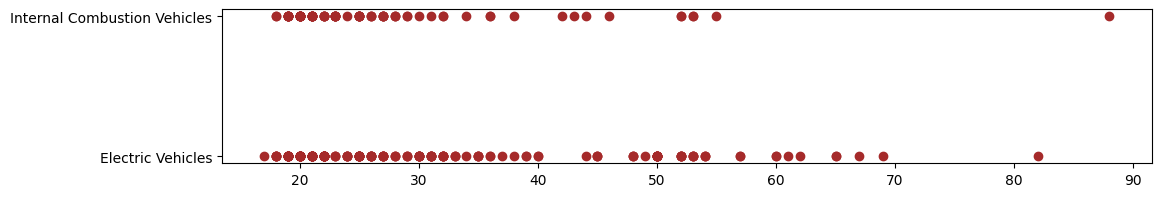

In [ ]:
#Age Segmentation for knowing the targetted audience
plt.figure(figsize=(12,2))
plt.scatter('Age','Vehicle_Preference',data=data3,color ='brown')

<Axes: xlabel='Income', ylabel='count'>

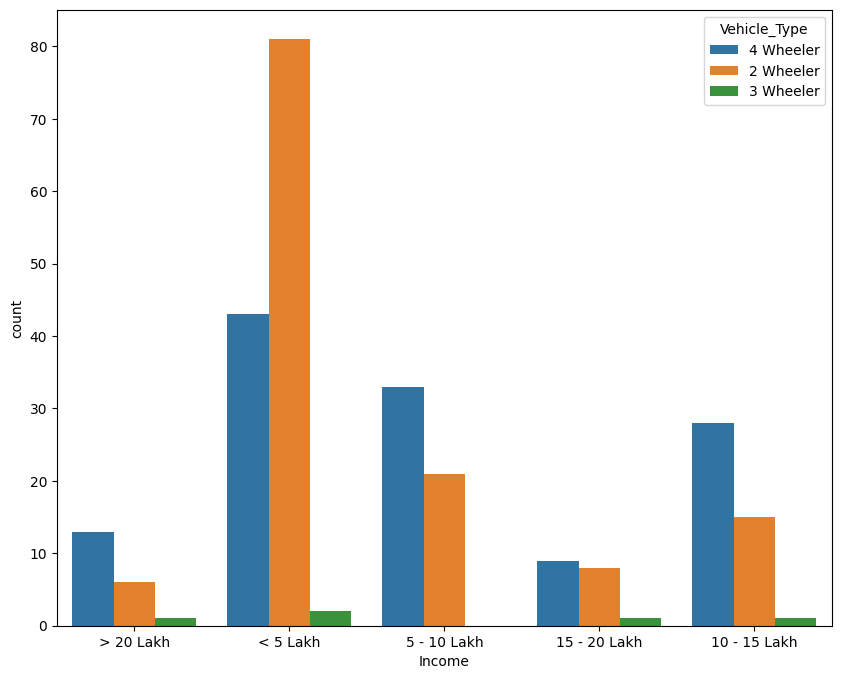

In [ ]:
# Income and Vehicle_Type segmentation to know the desirability
plt.figure(figsize=(10,8))
sns.countplot(x='Income', data=data3, hue='Vehicle_Type')

<Axes: xlabel='Income', ylabel='count'>

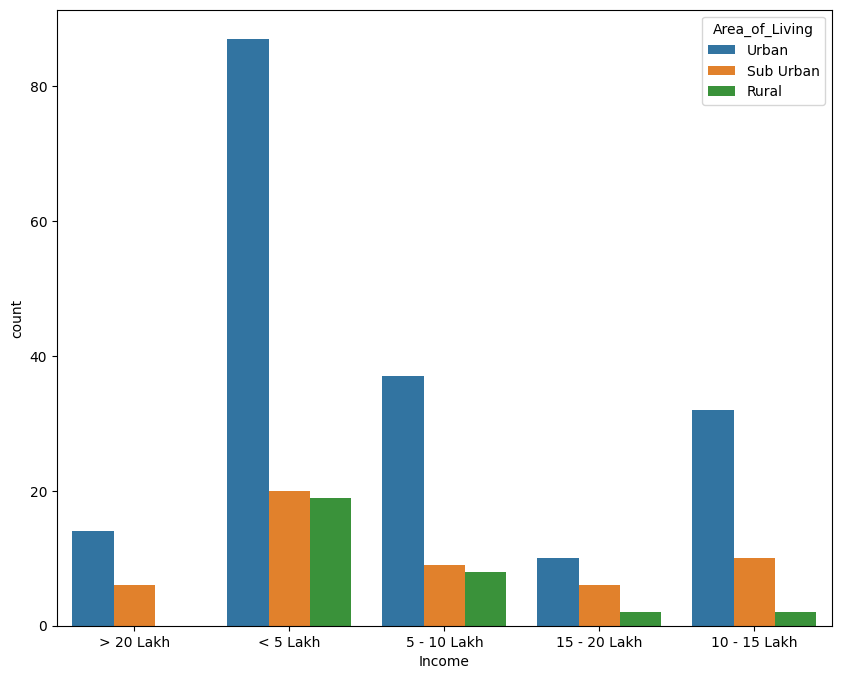

In [ ]:
# Income and Area_of_Living Visualization to find the suitable place of opening the showroom of the company
plt.figure(figsize=(10,8))
sns.countplot(x='Income', data=data3, hue='Area_of_Living')

<Axes: xlabel='Switch_EV', ylabel='count'>

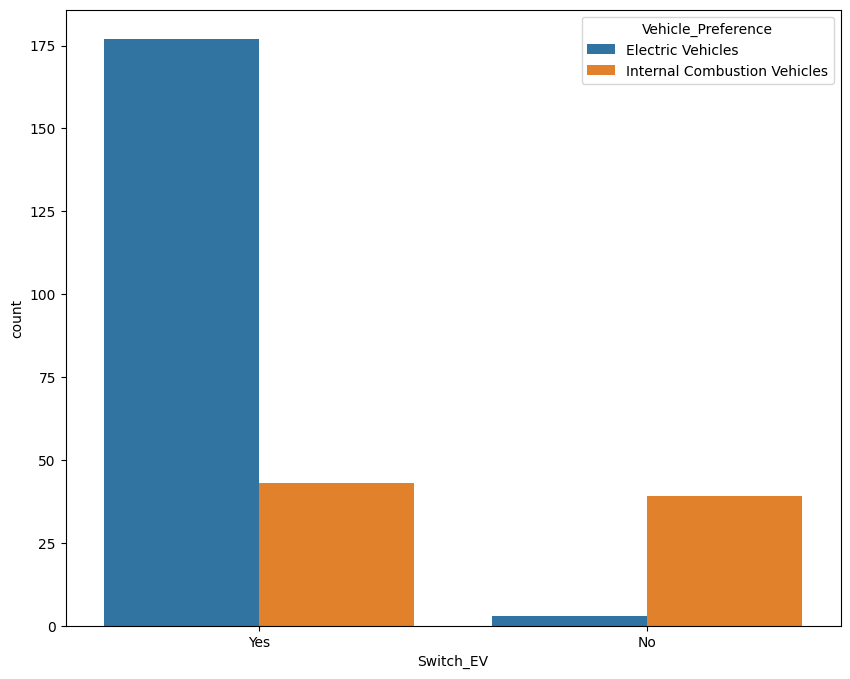

In [ ]:
# Switch_EV and Vehicle_Preference visualization to get the final targeted audience
plt.figure(figsize=(10,8))
sns.countplot(x='Switch_EV', data=data3, hue='Vehicle_Preference')

<Axes: xlabel='Vehicle_Type', ylabel='count'>

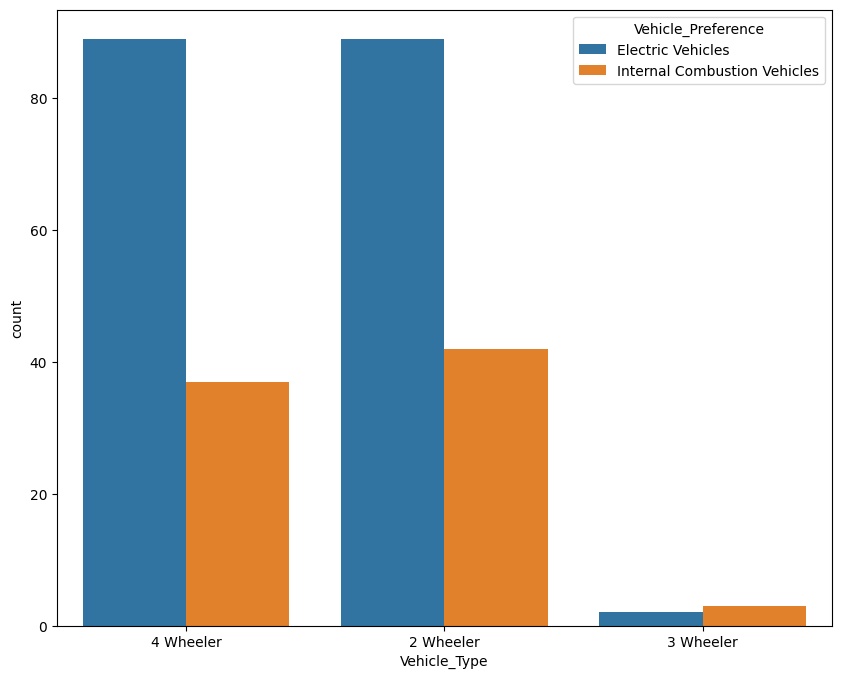

In [ ]:
#Vehicle_Type and Vehicle_Preference to know which type of Electric Vehicle should be manufactured in abundance
plt.figure(figsize=(10,8))
sns.countplot(x='Vehicle_Type', data=data3, hue='Vehicle_Preference')

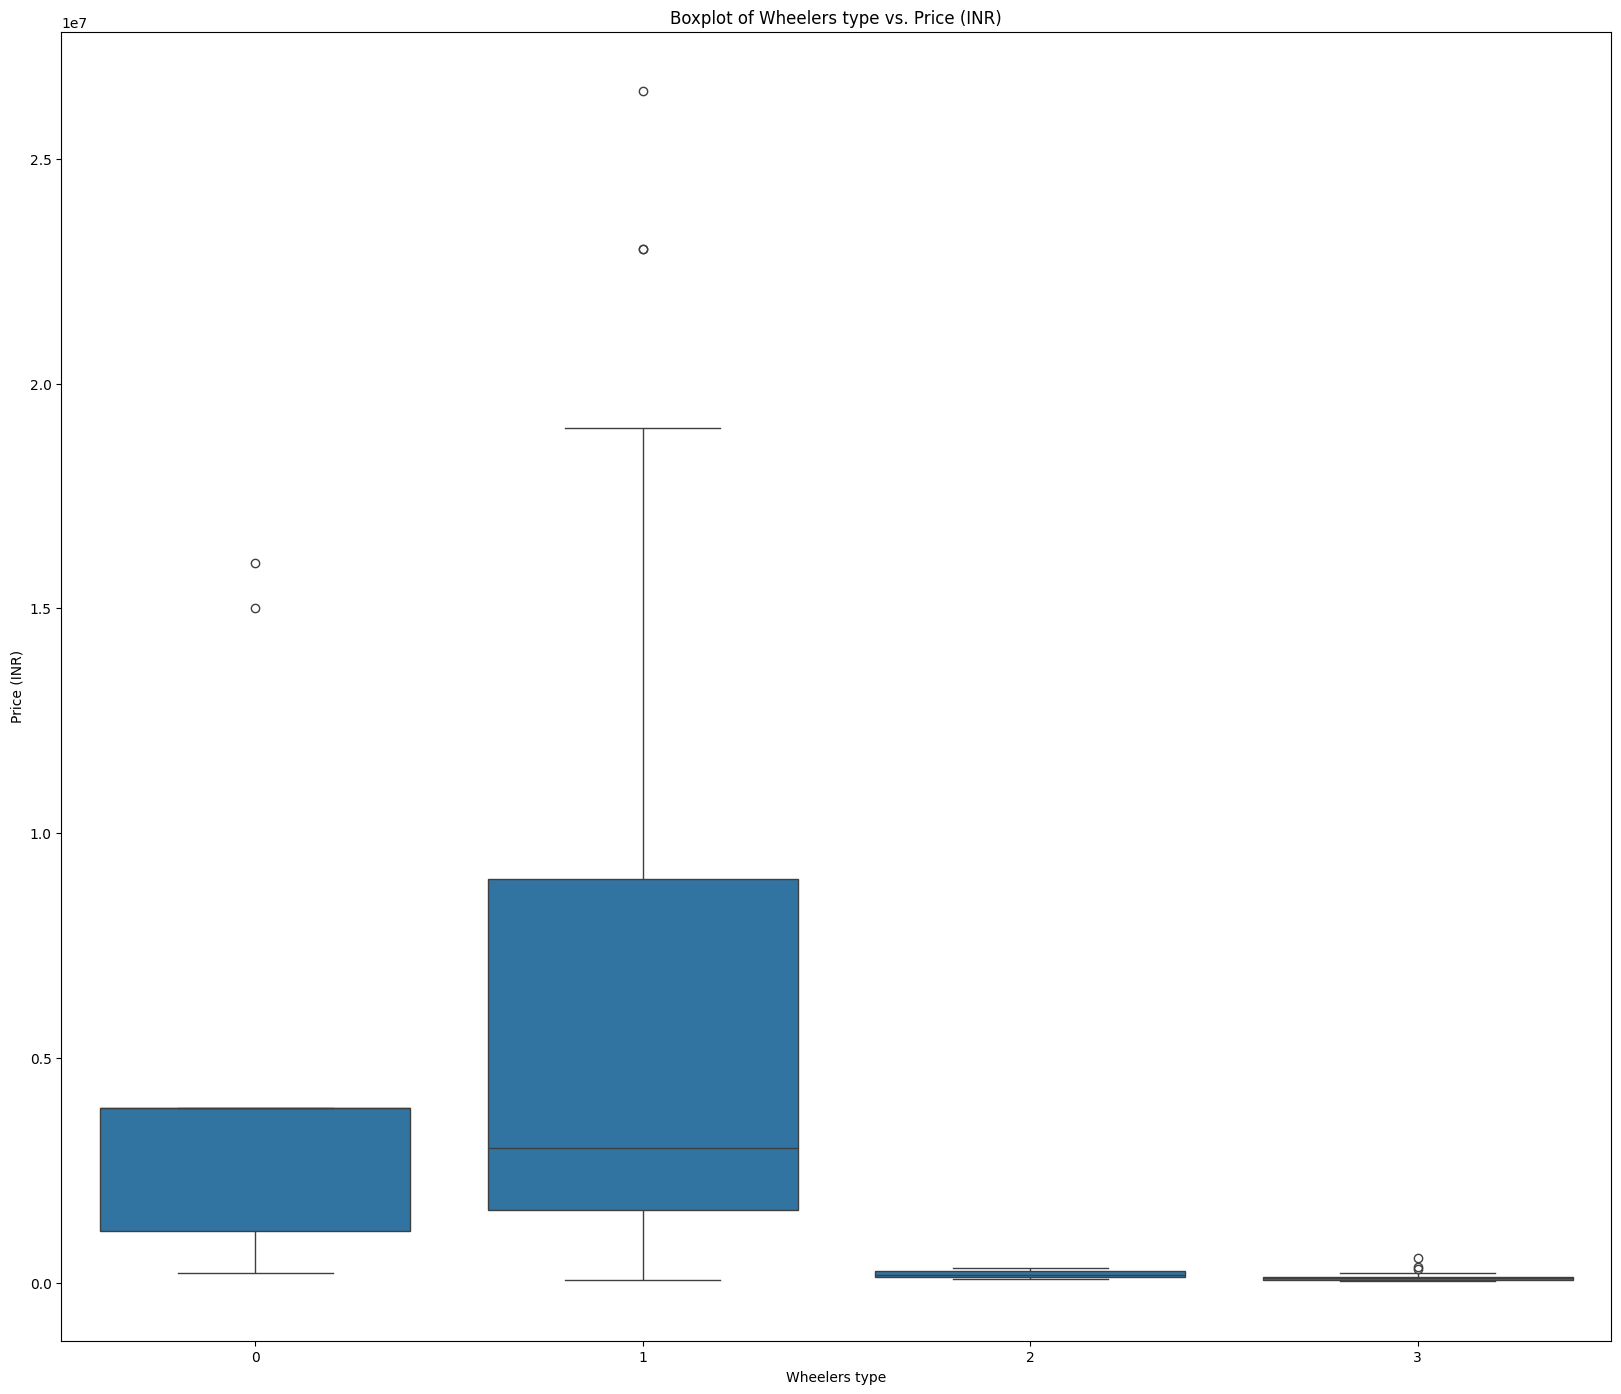

In [ ]:
# 'Wheelers type' and 'Fuel Type' columns
sns.boxplot(x='Wheelers type', y='Price (INR)', data=new_data)
plt.title('Boxplot of Wheelers type vs. Price (INR)')
plt.show()

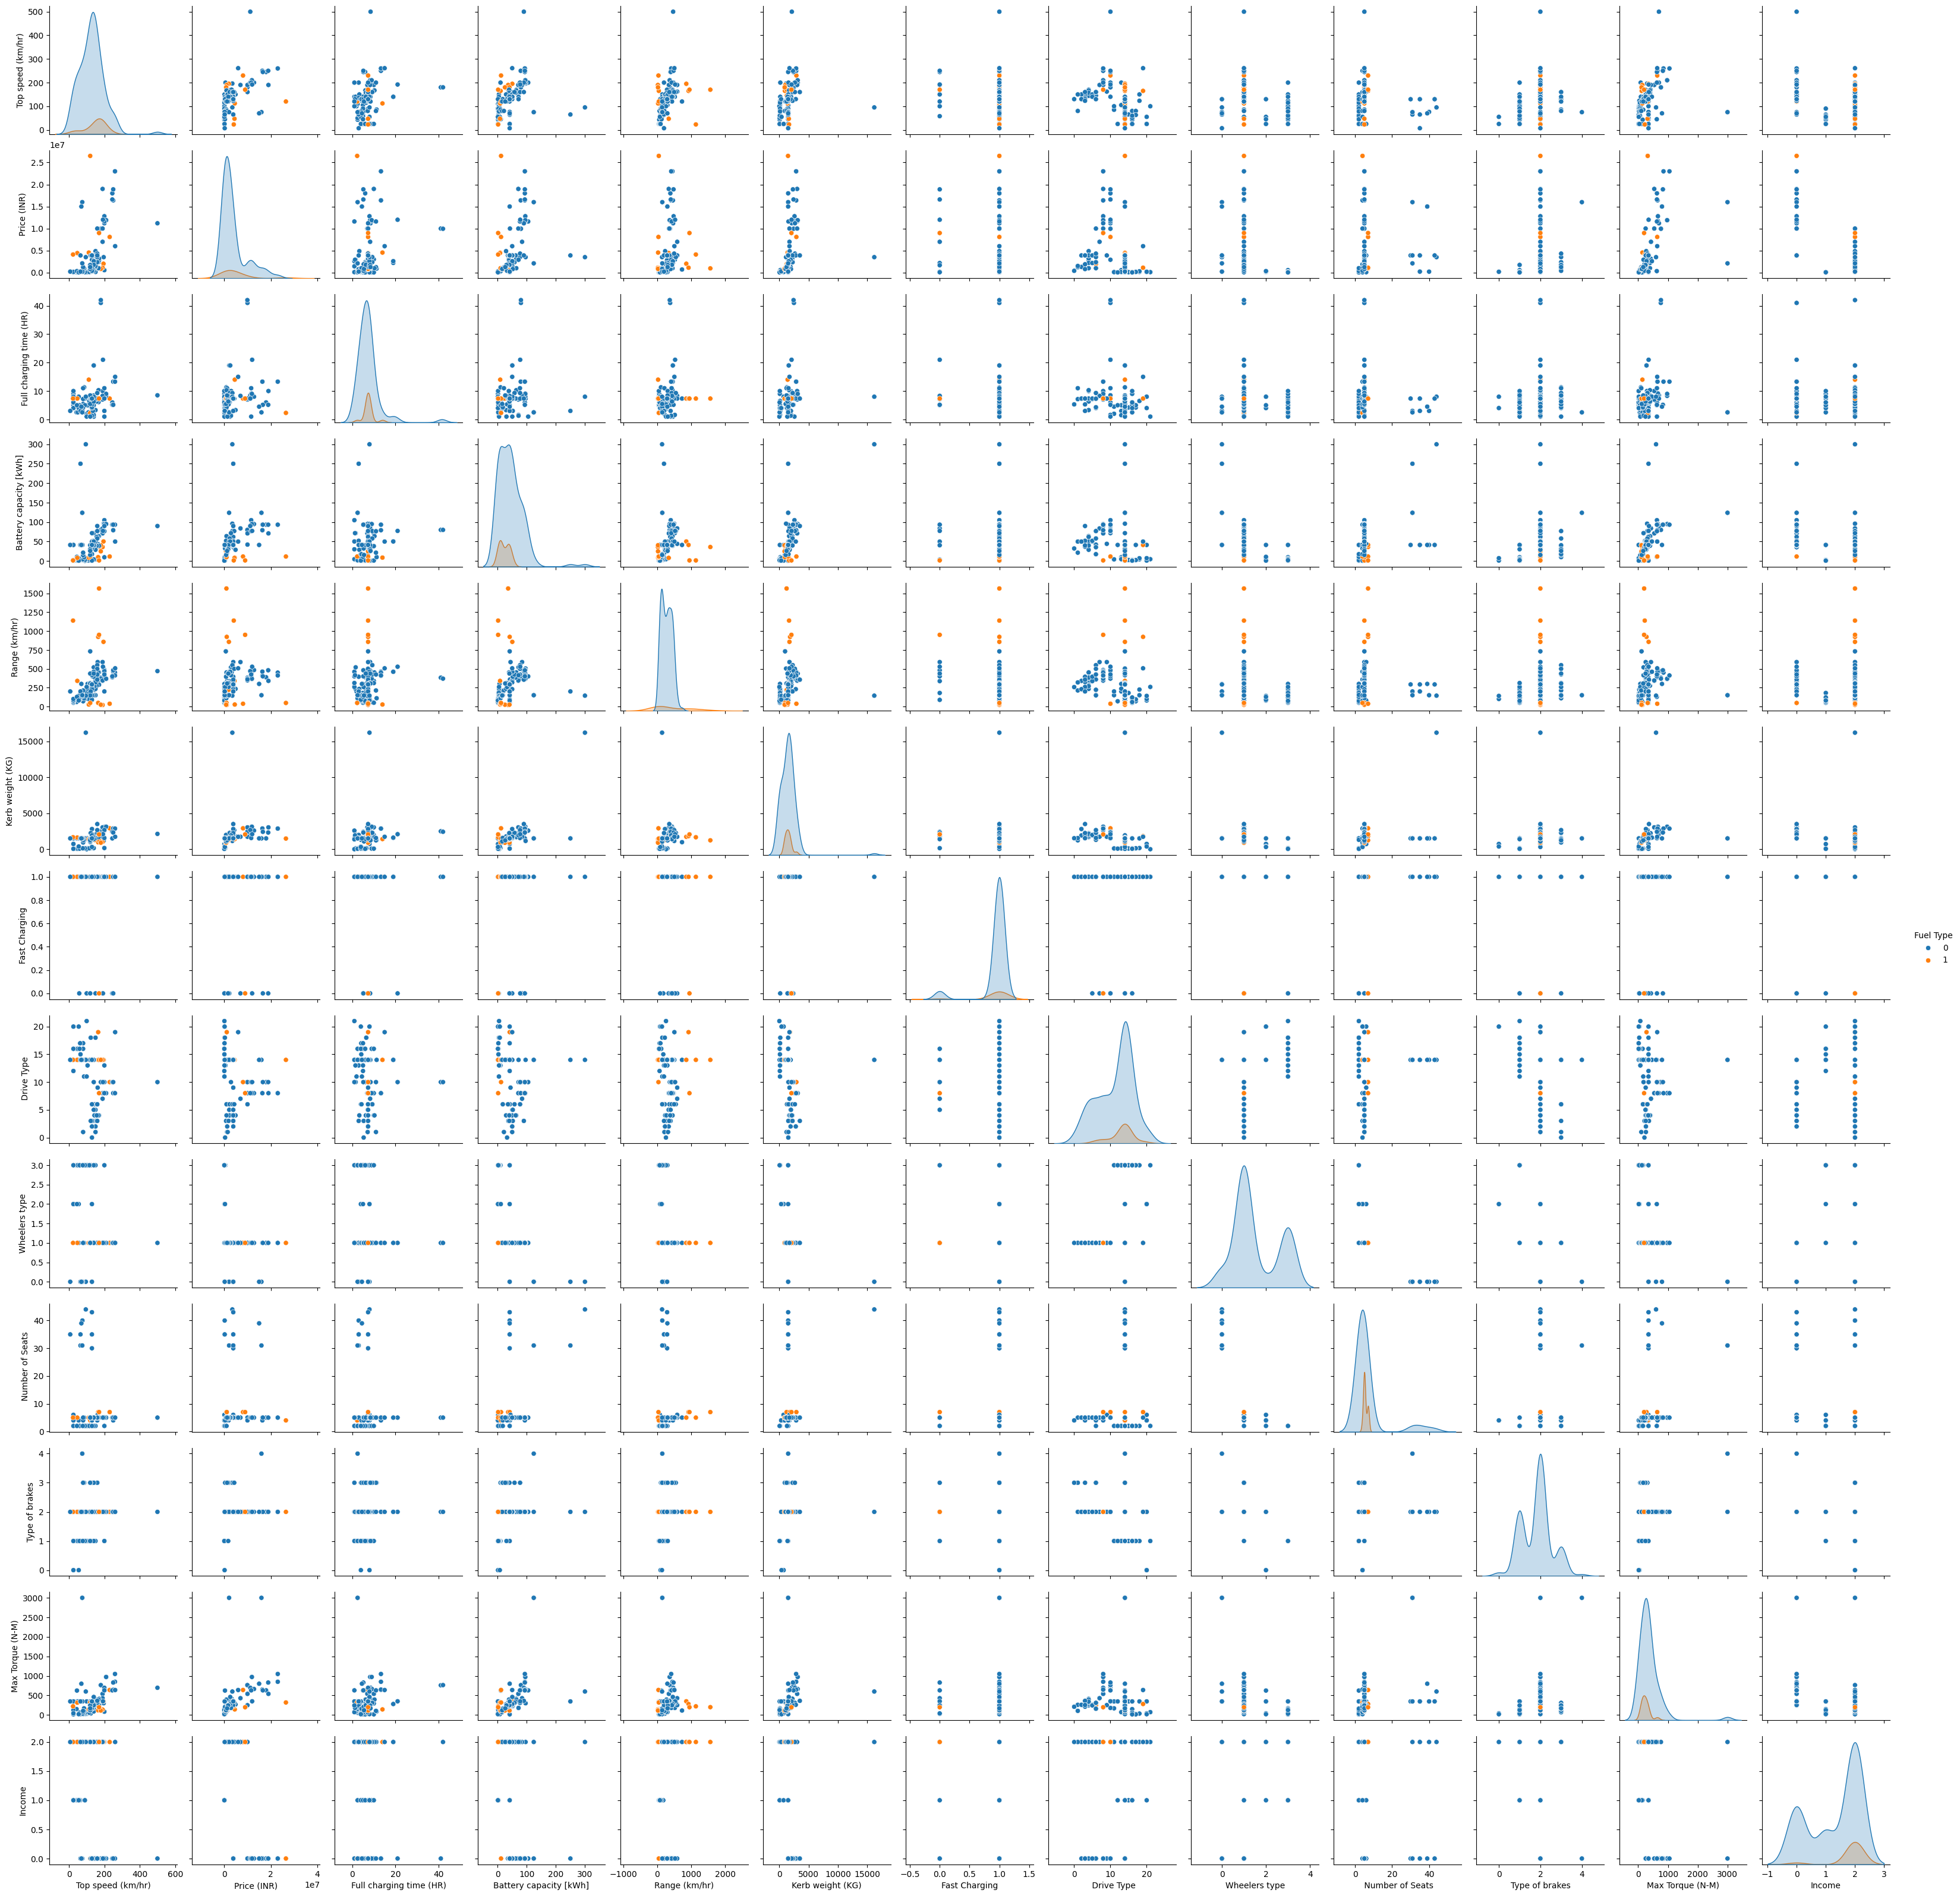

In [ ]:
# Plot pairwise relationships in the dataset
sns.pairplot(new_data, hue='Fuel Type')
plt.show()

<Axes: xlabel='count', ylabel='Budget'>

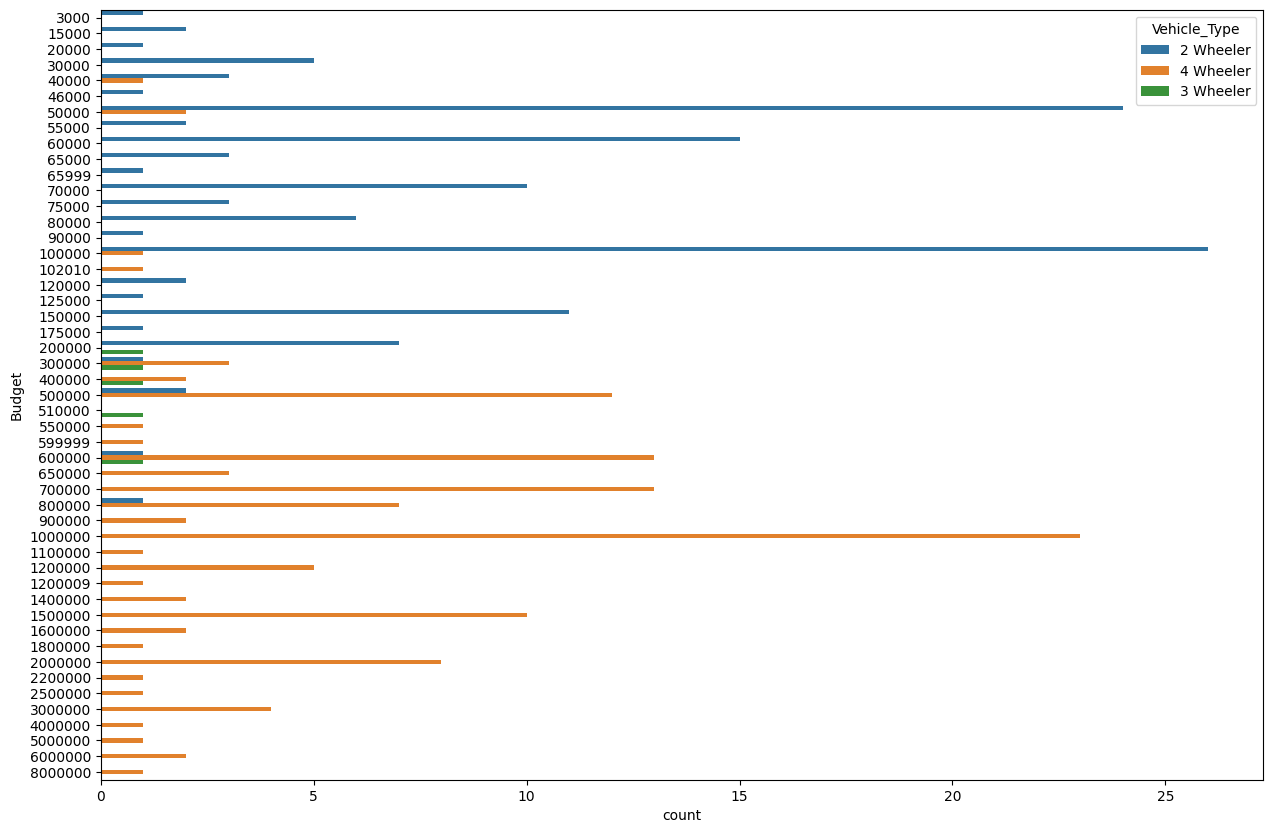

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y='Budget', data=data3, hue='Vehicle_Type')